### Logistic Regressoin With ROC curve and ROC AUC score

In [5]:
## roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
# generate 2 class dataset
X,y = make_classification(n_samples = 1000, n_classes =2, random_state=1)

In [12]:
# Split the data set into train and test
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25 ,random_state=42)
print(y_train)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 0 

In [13]:
# created a dummy model with every time it would gie 0 as output
dummy_model_prob = [0 for _  in range(len(y_test))]
print(len(dummy_model_prob))
print(dummy_model_prob)

250
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
## Lets create a actual logistic regression model 
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
# prediction Based on the probabilty
model_prob = model.predict_proba(X_test)
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [31]:
#focus on only in positive outcome
model_prob = model_prob[:,1]
model_prob

array([9.99041225e-01, 9.68866009e-02, 4.89372036e-01, 8.10046974e-01,
       1.12426807e-01, 4.39872005e-01, 8.29460814e-01, 7.13822440e-01,
       8.87707883e-01, 8.67973855e-01, 5.43854787e-04, 8.31200361e-01,
       1.91030219e-01, 5.39053079e-01, 7.28060254e-01, 8.23507048e-01,
       9.38587042e-01, 6.38367304e-01, 1.10159811e-01, 2.41034347e-01,
       1.15857322e-02, 4.90154702e-01, 8.88085107e-01, 9.97948102e-01,
       1.36945498e-01, 1.32643249e-02, 6.45087847e-01, 9.69507009e-01,
       3.99070556e-02, 2.38152731e-02, 3.69213417e-01, 3.40314906e-02,
       2.29858043e-01, 9.57101721e-01, 5.44958479e-01, 6.56791269e-01,
       1.52123558e-02, 2.93410161e-02, 7.80393330e-01, 2.99088014e-02,
       9.28398422e-01, 8.43395917e-01, 1.60117892e-02, 5.78395703e-04,
       6.61496895e-02, 6.69762422e-02, 9.97948178e-01, 6.55755704e-01,
       8.94036983e-01, 6.07000680e-02, 2.10340754e-02, 3.23954283e-02,
       1.03560315e-01, 5.44021349e-02, 5.64730236e-01, 9.87033757e-01,
      

In [32]:
## Lets calculate the scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [34]:
# calculate ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(y_test,model_prob)

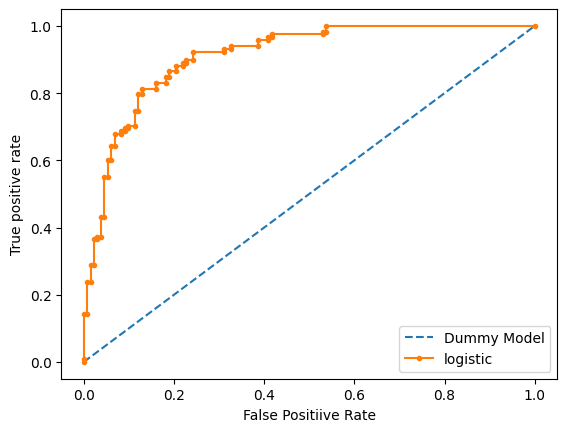

In [39]:
# plot the curve for the modle
pyplot.plot (dummy_fpr, dummy_tpr, linestyle ='--', label = 'Dummy Model')
pyplot.plot (model_fpr,model_tpr, marker ='.', label ='logistic')
#axis  labrels
pyplot.xlabel("False Positiive Rate")
pyplot.ylabel("True positive rate")
# shoe the legend
pyplot.legend()
#shoe the plot
pyplot.show()